<a href="https://colab.research.google.com/github/Harshitamishraz8/task/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA) on Retail Sales Data**

Data Loading and Cleaning:
Loading the Data:  loading the dataset using pandas. This involves reading the data from a CSV file  into a DataFrame.
Handling Missing Values: Check for missing values and  handle them, such as filling with the mean or median, or removing rows or columns.
Data Type Conversion: Ensure columns are of the correct data types, such as converting date columns to datetime format for proper time series analysis.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/retail_sales_dataset.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


 Statistics:
Calculate  statistics for numerical columns, including mean, median, and standard deviation.
Summarize categorical data by counting unique values to understand the distribution of categories.

In [ ]:
# Descriptive statistics for numerical columns
print(df.describe())

# Unique value counts for categorical columns
print(df['Product Category'].value_counts())


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

Sales Trends Over Time: Analyze sales trends by aggregating data over time and visualizing with line plots to observe overall sales performance.
Seasonality and Patterns: Identify seasonal patterns or cyclical trends in the sales data to understand recurring patterns.

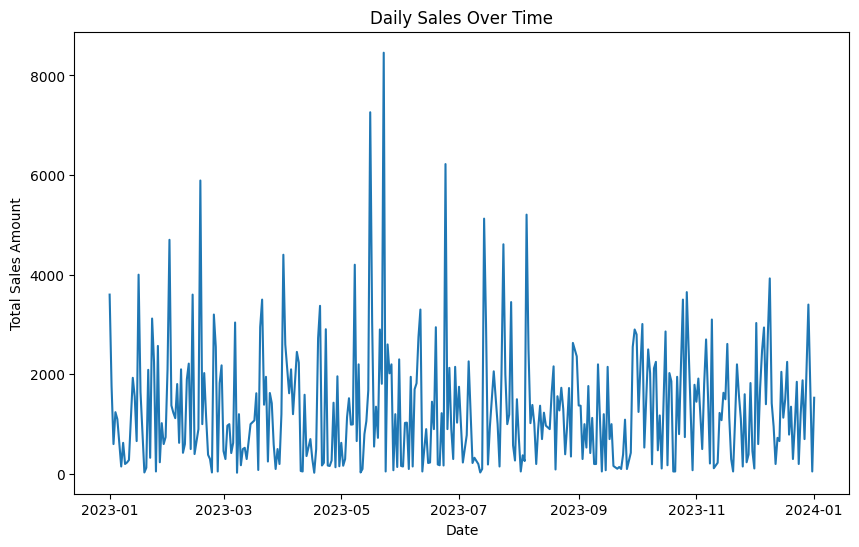

In [ ]:
import matplotlib.pyplot as plt

# Group data by date and sum the total amount
daily_sales = df.groupby('Date')['Total Amount'].sum()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


 Customer and Product Analysis:
Customer Demographics: Analyze customer demographics such as age and gender to understand the profile of your customer base.
Product Popularity: Examine which products are the most popular based on total sales to identify high-performing products.

Gender
Female    510
Male      490
Name: count, dtype: int64


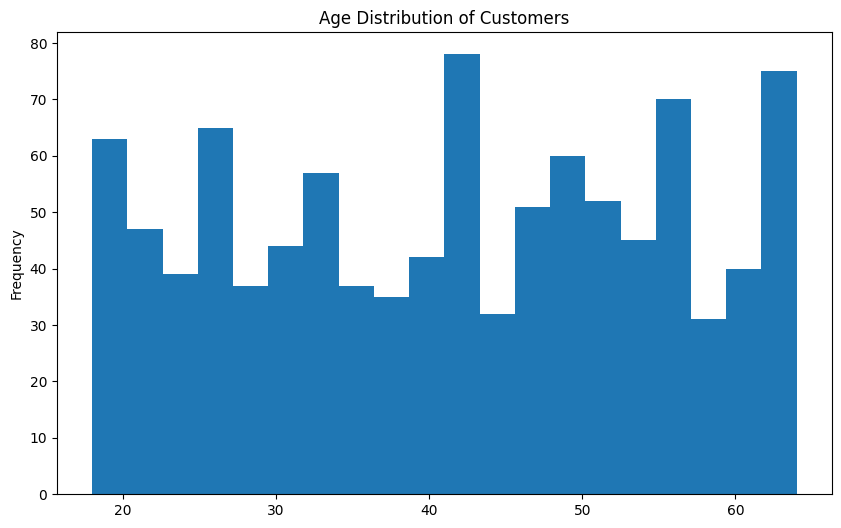

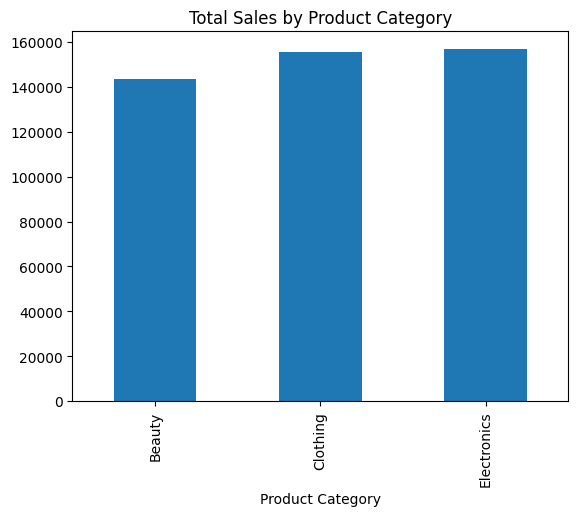

In [ ]:
# Gender distribution
print(df['Gender'].value_counts())

# Age distribution
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, title='Age Distribution of Customers')
plt.show()

# Product category popularity
product_sales = df.groupby('Product Category')['Total Amount'].sum()
product_sales.plot(kind='bar', title='Total Sales by Product Category')
plt.show()


 Visualization:
Utilize various visualization techniques such as bar charts, line plots, and heatmaps to represent data effectively.
For instance, visualizing the total sales per product category or exploring correlations between different variables can provide valuable insights.

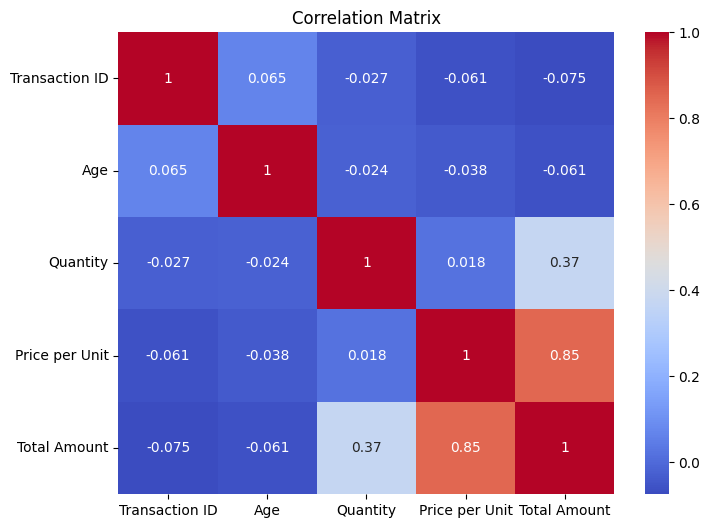

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you have only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
